# DataFrame(데이터프레임)

## DataFrame 개요
- 2차원 행렬 형태의 표를 다루는 Pandas 클래스
- 판다스의 가장 핵심적인 클래스
- 데이터베이스의 Table이나 R의 data.frame이나 Excel의 표와 동일한 역할
- 행이름: index 열이름: column
    - 이름을 명시적으로 지정할 수도 있다.
    - 지정하지 않으면 0부터 1씩 증가하는 값이 붙는다.
    - 하나의 행과 하나의 열은 Series로 구성된다.
- 직접 데이터를 넣어 데이터 셋을 파일(csv, 엑셀)로 부터 읽어와 생성한다.

## DataFrame 생성
###  직접 생성
- `pd.DataFrame(data [, index=None, columns=None])`
- data 
    - DataFrame을 구성할 값을 설정
        - Series, List, ndarray를 담은 다차원 배열
        - 열이름을 key로 컬럼의 값 value로 하는 딕션어리(사전)
    - index
        - index명으로 사용할 값 배열로 설정
    - columns
        - 컬럼명으로 사용할 값 배열로 설정

In [2]:
import pandas as pd
name = {'id':['id-1','id-2','id-3','id-4','id-5'], 
        'korean':[100,50,70,60,90], 
        'eng':[90,80,100,50,100]}
score_df=pd.DataFrame(name)

In [3]:
score_df

,id,korean,eng
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [1]:
import numpy as np
arr=np.arange(12).reshape(4,3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
arr_df=pd.DataFrame(arr, columns=['A','B','C'], index=['가','나','다','라'])  # column명, index명 중복가능
arr_df  # print() 쓰지 말 것

,A,B,C
가,0,1,2
나,3,4,5
다,6,7,8
라,9,10,11


### DataFrame 파일로 저장 ( csv, excel )

- DataFrame객체.to_csv(파일경로,sep=',', index=True, header=True, encoding)
    - 텍스트 파일로 저장
    - 파일경로: 저장할 파일경로(경로/파일명)
    - sep : 데이터 구분자
    - index, header: 인덱스/헤더 저장 여부
    - encoding
        - 파일인코딩
        - 생략시 운영체제 기본 encoding 방식
- DataFrame객체.to_excel(파일경로, index=True, header=True)
    - 엑셀파일로 저장

In [10]:
score_df.to_csv('score.csv')

In [3]:
score_df.to_csv('score2.csv', header=False, index=False)

NameError: name 'score_df' is not defined

In [14]:
score_df.to_csv('score3.csv', index=False)

In [2]:
pd.read_csv('score.csv') # Unnamed: 0

NameError: name 'pd' is not defined

In [17]:
pd.read_csv('score2.csv')  # header가 없는 경우 첫번째 행을 column으로 처리

,id-1,100,90
0,id-2,50,80
1,id-3,70,100
2,id-4,60,50
3,id-5,90,100


In [19]:
pd.read_csv('score2.csv', header=None)  # header가 없다는 것을 명시하기

,0,1,2
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [18]:
pd.read_csv('score3.csv')

,id,korean,eng
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [21]:
score_df.to_excel('score.xls', index=False)

### 파일로 부터 생성하기
### csv 파일 등 텍스트 파일로 부터 읽어와 생성
- `pd.read_csv(파일경로, sep=',', header, index_col, encoding)`
    - 파일경로 : 읽어올 파일의 경로
    - sep
        - 데이터 구분자. 
        - 기본값: 쉼표
    - header=정수
        - 열이름(컬럼이름)으로 사용할 행 지정
        - 기본값: 첫번째 행
        - None 설정: 열 이름으로 순번을(0부터 시작) 사용한다.
    - index_col=정수,컬럼명
        - index 명으로 사용할 열이름이나 순번 지정
        - 생략시 순번을 사용
    - encoding
        - 파일 인코딩
        - 생략시 운영체제 기본 encoding 방식

In [22]:
pd.read_csv('score3.csv')

,id,korean,eng
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [24]:
pd.read_csv('score3.csv', header=3)

,id-3,70,100
0,id-4,60,50
1,id-5,90,100


In [26]:
pd.read_csv('score3.csv', index_col='id')  # id컬럼은 idex명으로 사용

,korean,eng
id,,
id-1,100,90
id-2,50,80
id-3,70,100
id-4,60,50
id-5,90,100


In [30]:
movie1=pd.read_csv('data/movie.csv')
movie1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [31]:
movie2=pd.read_csv('data/movie.csv', index_col='movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


### 엑셀파일 읽기

In [34]:
pd.read_excel('score.xls')

,id,korean,eng
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [35]:
score_df.T

,0,1,2,3,4
id,id-1,id-2,id-3,id-4,id-5
korean,100,50,70,60,90
eng,90,80,100,50,100


### TODO 파일로 저장

In [3]:
# 데이터프레임 movie1를 csv 파일로 저장(파일명 : movie_df1.csv)

# 데이터프레임 movie1를 csv 엑셀파일로 저장(파일명 : movie_df1.xlsx)


## 주요 메소드 

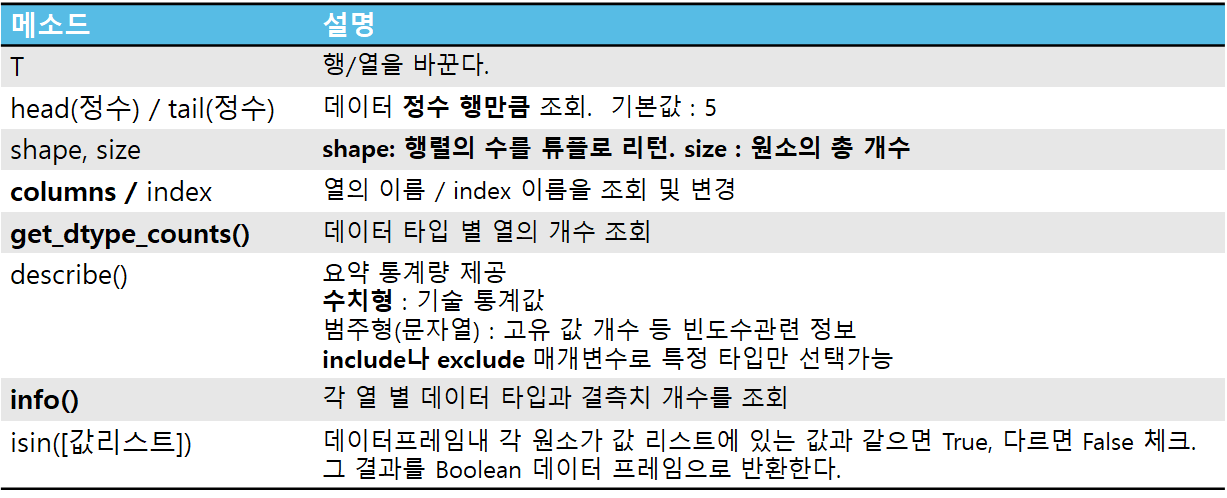

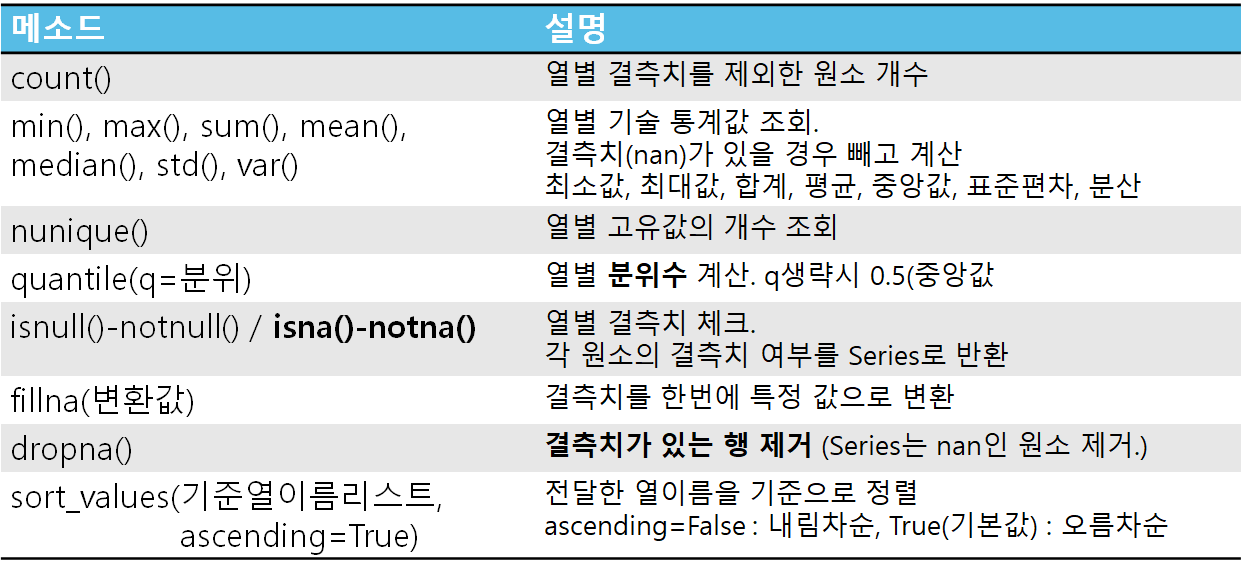

In [38]:
movie1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [40]:
movie1.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [41]:
movie1.shape

(4916, 28)

In [42]:
movie1.size

137648

In [43]:
movie1.columns  # 컬럼 이름들을 리스트로 반환

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [44]:
movie1.index # index명을 리스트로 반환

RangeIndex(start=0, stop=4916, step=1)

In [45]:
movie2.index

Index(['Avatar', 'Pirates of the Caribbean: At World's End', 'Spectre',
       'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens',
       'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron',
       'Harry Potter and the Half-Blood Prince',
       ...
       'Primer', 'Cavite', 'El Mariachi', 'The Mongol King', 'Newlyweds',
       'Signed Sealed Delivered', 'The Following', 'A Plague So Pleasant',
       'Shanghai Calling', 'My Date with Drew'],
      dtype='object', name='movie_title', length=4916)

In [48]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
id        5 non-null object
korean    5 non-null int64
eng       5 non-null int64
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [47]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
id        5 non-null object
korean    5 non-null int64
eng       5 non-null int64
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [46]:
movie1.info()  # 컬럼들의 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
color                        4897 non-null object
director_name                4814 non-null object
num_critic_for_reviews       4867 non-null float64
duration                     4901 non-null float64
director_facebook_likes      4814 non-null float64
actor_3_facebook_likes       4893 non-null float64
actor_2_name                 4903 non-null object
actor_1_facebook_likes       4909 non-null float64
gross                        4054 non-null float64
genres                       4916 non-null object
actor_1_name                 4909 non-null object
movie_title                  4916 non-null object
num_voted_users              4916 non-null int64
cast_total_facebook_likes    4916 non-null int64
actor_3_name                 4893 non-null object
facenumber_in_poster         4903 non-null float64
plot_keywords                4764 non-null object
movie_imdb_link              4916 non-

In [50]:
# 결측치
movie1.isnull().sum()  # sum(): 컬럼단위로 계산

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [52]:
movie1.isna().sum()  # isna()는 DataFrame만 제공(Series에는 없다.)

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [53]:
movie1.describe().T  # 각 컬럼들의 통계를 요약해서 조회 - 기본: 수치형 컬럼들만 조회

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.019656e+06,8.361750e+03,1394.750000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000
75%,191.000000,118.000000,189.750000,633.000000,11000.000000,6.110841e+07,9.377275e+04,13616.750000,2.000000,320.500000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [54]:
movie1.describe(include=['object'])
# include: 보고자하는 컬럼의 데이터 타입 리스트로 전달
# exclude: 안보려는 컬럼의 데이터 타입들을 리스트로 전달

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4897,4814,4903,4916,4909,4916,4893,4764,4916,4904,4911,4616
unique,2,2397,3030,914,2095,4916,3519,4756,4916,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,El crimen del padre Amaro,Steve Coogan,based on novel,http://www.imdb.com/title/tt1244659/?ref_=fn_t...,English,USA,R
freq,4693,26,18,233,48,1,8,4,1,4582,3710,2067


## 데이터 프레임의 기본 정보 조회
- csv 파일 읽기
- shape
- head()
- tail()
- info()
- get_dtype_counts()
- isnull().sum() => 컬럼별 null 체크 (sum() 한번더 하면 총개수)
- index / columns : index와, 컬럼명 조회
- describe() : 숫자형-기술통계값, 문자열-총개수, 유니크값, 최빈값

In [1]:
import pandas as pd
df=pd.read_csv('data/movie.csv')
df.shape

(4916, 28)

In [2]:
df.head()  # 구조파악할때 많이 사용

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [4]:
df.info()  # column에 대한 상세정보 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
color                        4897 non-null object
director_name                4814 non-null object
num_critic_for_reviews       4867 non-null float64
duration                     4901 non-null float64
director_facebook_likes      4814 non-null float64
actor_3_facebook_likes       4893 non-null float64
actor_2_name                 4903 non-null object
actor_1_facebook_likes       4909 non-null float64
gross                        4054 non-null float64
genres                       4916 non-null object
actor_1_name                 4909 non-null object
movie_title                  4916 non-null object
num_voted_users              4916 non-null int64
cast_total_facebook_likes    4916 non-null int64
actor_3_name                 4893 non-null object
facenumber_in_poster         4903 non-null float64
plot_keywords                4764 non-null object
movie_imdb_link              4916 non-

In [5]:
df.get_dtype_counts() # .get_dtype_counts() 함수는 곧 없어질 예정

float64    13
int64       3
object     12
dtype: int64

In [6]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [7]:
df.dtypes.value_counts()  # 가급적 이 함수를 사용하도록.

float64    13
object     12
int64       3
dtype: int64

In [11]:
df.isnull().sum() # or df.isna()  # 컬럼별로 몇개가 있는지

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4867.0,1.379889e+02,1.202394e+02,1.00,49.00,108.00,191.00,8.130000e+02
duration,4901.0,1.070908e+02,2.528602e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4814.0,6.910145e+02,2.832954e+03,0.00,7.00,48.00,189.75,2.300000e+04
actor_3_facebook_likes,4893.0,6.312763e+02,1.625875e+03,0.00,132.00,366.00,633.00,2.300000e+04
actor_1_facebook_likes,4909.0,6.494488e+03,1.510699e+04,0.00,607.00,982.00,11000.00,6.400000e+05
gross,4054.0,4.764451e+07,6.737255e+07,162.00,5019656.25,25043962.00,61108412.75,7.605058e+08
num_voted_users,4916.0,8.264492e+04,1.383222e+05,5.00,8361.75,33132.50,93772.75,1.689764e+06
cast_total_facebook_likes,4916.0,9.579816e+03,1.816432e+04,0.00,1394.75,3049.00,13616.75,6.567300e+05
facenumber_in_poster,4903.0,1.377320e+00,2.023826e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4895.0,2.676688e+02,3.729348e+02,1.00,64.00,153.00,320.50,5.060000e+03


In [19]:
df.describe(include=['object']).T  # object: 문자열

,count,unique,top,freq
color,4897,2,Color,4693
director_name,4814,2397,Steven Spielberg,26
actor_2_name,4903,3030,Morgan Freeman,18
genres,4916,914,Drama,233
actor_1_name,4909,2095,Robert De Niro,48
movie_title,4916,4916,Zoom,1
actor_3_name,4893,3519,Steve Coogan,8
plot_keywords,4764,4756,based on novel,4
movie_imdb_link,4916,4916,http://www.imdb.com/title/tt0466342/?ref_=fn_t...,1
language,4904,47,English,4582


## 컬럼이름/행이름 조회 및 변경
### 컬럼이름/행이름 조회
- DataFrame객체.columns
    - 컬럼명 조회
    - 컬럼명은 차후 조회를 위해 따로 변수에 저장하는 것이 좋다.
- DataFrame객체.index
    - 행명 조회

In [16]:
df.columns  # 컬럼들을 리스트로 반환 -> 슬라이싱도 가능

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=4916, step=1)

### 컬럼이름/행이름 변경
- 컬럼과 인덱스는 불변의 성격을 가짐
- columns와 index 속성으로는 통째로 바꾸는 것은 가능하나 index로 하나씩 바꾸는 것은 안된다.
    - `df.columns[1] = '새이름' # 이건 안된다. `
    - `df.columns=['컬럼명','컬럼명','컬럼명',..]` <= 단, 전체 컬럼명을 바꿀 때엔 가능

### 컬럼이름/행이름 변경 관련 메소드     .rename
- `DataFrame객체.rename(index=행이름변경설정, columns=열이름변경설정, inplace=False)`
    - 개별 컬럼이름/행이름 변경 하는 메소드
    - 변경한 DataFrame을 반환
    - 변경설정: 딕셔너리 사용
        - {'기존이름':'새이름', ..}
        - inplace: 원본을 변경할지 여부(boolean)
- `DataFrame객체.set_index(컬럼이름, inplace=False)`
    - 특정 컬럼을 행의 index 명으로 사용
    - 열이 index명이 되면서 그 컬럼은 DataFrame에서 제거된다.
- `DataFrame객체.reset_index(inplace=False)`
    - index를 첫번째 컬럼으로 복원

In [21]:
score_df=pd.read_csv('score2.csv', header=None) # header=None: df에 컬럼명이 존재하지 않는 경우 임의로 컬럼명 지정해줌
score_df

,0,1,2
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [23]:
score_df.columns=['ID','Korean','English']  # 전체 컬럼명을 변경할 때 (리스트 원소와 컬럼의 개수가 동일해야 함)
score_df  # 원본 df도 같이 변경

,ID,Korean,English
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [26]:
# 컬럼명 일부 변경
score_df.rename(columns={'ID':'아이디'}) # 컬럼 하나만 바꾸는 경우

,아이디,Korean,English
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [27]:
dic={
    'Korean':'국어',
    'English':'영어'
}
score_df.rename(columns=dic)  # 여러 컬럼을 바꾸는 경우 딕셔너리를 미리 설정하는 것이 편함

,ID,국어,영어
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [29]:
score_df.rename(columns=dic, inplace=True) # inplace=True: 원본도 함께 변경
score_df

,ID,국어,영어
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [30]:
score_df.rename?

In [31]:
score_df.rename(index={0:'영',2:'이'})  # index명 변경, 원본은 변경되지 않음

,ID,국어,영어
영,id-1,100,90
1,id-2,50,80
이,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [35]:
score_df2=score_df.set_index('ID')  # ID컬럼을 index로 변환 -> ID는 더이상 값이 아니게 됨
score_df2

,국어,영어
ID,,
id-1,100,90
id-2,50,80
id-3,70,100
id-4,60,50
id-5,90,100


In [36]:
score_df2.index

Index(['id-1', 'id-2', 'id-3', 'id-4', 'id-5'], dtype='object', name='ID')

In [37]:
score_df2.loc['id-2']  # index명이 id-2인 행을 조회

국어    50
영어    80
Name: id-2, dtype: int64

In [42]:
score_df2.describe(include=['object'])  # ID를 index로 변환됐기 때문에 값이 아님 => 오류발생

ValueError: No objects to concatenate

In [44]:
score_df.set_index(['ID','영어']) # 멀티 index: 'ID','영어' 두개의 컬럼을 index로 변환할 땐 리스트로 묶어서

,,국어
ID,영어,
id-1,90,100
id-2,80,50
id-3,100,70
id-4,50,60
id-5,100,90


In [46]:
score_df2.reset_index()  # index를 컬럼으로 변환 <-> set_index(특정 컬럼을 index로 변환)

,ID,국어,영어
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


## 행 / 열 삭제
- DataFrame객체.drop(columns, index, inplace=False)
    - columns : 삭제할 열이름 또는 열이름 리스트
    - index : 삭제할 index명 또는 index 리스트
    - inplace: 원본을 변경할지 여부(boolean) (기본 False)

In [47]:
score_df.drop(columns=['ID'])  # ID컬럼 삭제, 원본은 바뀌지 않음

,국어,영어
0,100,90
1,50,80
2,70,100
3,60,50
4,90,100


In [48]:
score_df.drop(columns=['ID','영어'])

,국어
0,100
1,50
2,70
3,60
4,90


In [49]:
score_df.drop(index=[0])  # 0번 행 삭제

,ID,국어,영어
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [50]:
score_df.drop(index=[0,2,3])  # 이 방법으로 슬라이싱 불가

,ID,국어,영어
1,id-2,50,80
4,id-5,90,100


In [53]:
score_df.drop(index=score_df.index[1:4])  # 슬라이싱으로 삭제할 경우 index처리하여 리스트로 만든 후 삭제

,ID,국어,영어
0,id-1,100,90
4,id-5,90,100


In [54]:
score_df.drop(index=[2,3], columns=['국어'])  # index, columns 동시 삭제

,ID,영어
0,id-1,90
1,id-2,80
4,id-5,100


In [57]:
score_df

,ID,국어,영어
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


### 열 추가 : df['새열명']=값
- 새로운 열을 지정 후 값을 대입하면 새로운 열을 추가할 수 있다.
    - 보통 파생변수를 만들 때 사용한다.
- df['새열명'] = 값
    - 마지막 열로 추가된다.
    - 하나의 값을 대입하면 모든 행에 그 값이 대입된다.
    - 다른 값을 주려면 배열에 담아서 대입한다.
- 기존 열들의 값을 이용한 새로운 열 생성
    - 벡터 연산을 이용하여 값 대입
    - df[‘새열이름‘] = 기존 열들을 이용한 연산

In [4]:
import pandas as pd
import numpy as np

In [5]:
score_df=pd.read_csv('score3.csv')
new_name=dict(id='ID',korean='국어',eng='영어')
score_df.rename(columns=new_name, inplace=True) # or score_df=score_df.rename(columns=new_name) 덮어쓰기
score_df

,ID,국어,영어
0,id-1,100,90
1,id-2,50,80
2,id-3,70,100
3,id-4,60,50
4,id-5,90,100


In [6]:
score_df['수학']=90  # 수학 컬럼 추가 (값은 값)
score_df

,ID,국어,영어,수학
0,id-1,100,90,90
1,id-2,50,80,90
2,id-3,70,100,90
3,id-4,60,50,90
4,id-5,90,100,90


In [7]:
score_df['과학']=[90,80,30,50,60]  # 다른 값을 추가 할 때엔 리스트로 (index개수 맞추기)
score_df

,ID,국어,영어,수학,과학
0,id-1,100,90,90,90
1,id-2,50,80,90,80
2,id-3,70,100,90,30
3,id-4,60,50,90,50
4,id-5,90,100,90,60


In [8]:
import numpy as np
score_df['역사']=np.random.randint(50,100,size=5)
score_df

,ID,국어,영어,수학,과학,역사
0,id-1,100,90,90,90,78
1,id-2,50,80,90,80,53
2,id-3,70,100,90,30,89
3,id-4,60,50,90,50,75
4,id-5,90,100,90,60,95


In [9]:
score_df['과학'] # 컬럼의 값 조회 - 한개의 컬럼을 조회하면 Series로 반환

0    90
1    80
2    30
3    50
4    60
Name: 과학, dtype: int64

In [10]:
total=score_df['국어'] + score_df['과학'] + score_df['수학'] + score_df['영어'] + score_df['역사']
# index별로 값을 더함
total

0    448
1    353
2    379
3    325
4    435
dtype: int64

In [11]:
score_df['총점']=total  # 총점 컬럼 추가
score_df

,ID,국어,영어,수학,과학,역사,총점
0,id-1,100,90,90,90,78,448
1,id-2,50,80,90,80,53,353
2,id-3,70,100,90,30,89,379
3,id-4,60,50,90,50,75,325
4,id-5,90,100,90,60,95,435


In [12]:
average=total/5
average

0    89.6
1    70.6
2    75.8
3    65.0
4    87.0
dtype: float64

In [13]:
score_df['평균']=average
score_df

,ID,국어,영어,수학,과학,역사,총점,평균
0,id-1,100,90,90,90,78,448,89.6
1,id-2,50,80,90,80,53,353,70.6
2,id-3,70,100,90,30,89,379,75.8
3,id-4,60,50,90,50,75,325,65.0
4,id-5,90,100,90,60,95,435,87.0


In [85]:
# 총점, 평균 컬럼은 기존 컬럼들의 값을 이용해 생성된 값을 추가 => 파생변수

In [86]:
score_df[score_df.columns[1:5]].sum() # sum()함수 기본 axis=0 -> 열 기준으로 더해짐

국어    370
영어    420
수학    450
과학    310
dtype: int64

In [87]:
score_df[score_df.columns[1:5]].sum(axis=1)  # 행 기준으로 더함

0    370
1    300
2    290
3    250
4    340
dtype: int64

In [5]:
score_df[score_df.columns[1:5]].mean(axis=1)

NameError: name 'score_df' is not defined

## TODO
- 패스 여부를 boolean값으로 저장하는 컬럼을 추가
    - 컬럼명: pass
    - 기준: 평균점수가 80미만이면 False,이상이면 True가 나오도록 처리

In [15]:
score_df

,ID,국어,영어,수학,과학,역사,총점,평균
0,id-1,100,90,90,90,78,448,89.6
1,id-2,50,80,90,80,53,353,70.6
2,id-3,70,100,90,30,89,379,75.8
3,id-4,60,50,90,50,75,325,65.0
4,id-5,90,100,90,60,95,435,87.0


In [20]:
score_df['통과여부']=score_df['평균'] >= 80
score_df

,ID,국어,영어,수학,과학,역사,총점,평균,통과여부
0,id-1,100,90,90,90,78,448,89.6,True
1,id-2,50,80,90,80,53,353,70.6,False
2,id-3,70,100,90,30,89,379,75.8,False
3,id-4,60,50,90,50,75,325,65.0,False
4,id-5,90,100,90,60,95,435,87.0,True


In [24]:
score_df['통과여부']=np.where(score_df['평균'] >= 80,'통과','실패')  # np.where(조건): True 행의 index를 알려줌
score_df

,ID,국어,영어,수학,과학,역사,총점,평균,통과여부
0,id-1,100,90,90,90,78,448,89.6,통과
1,id-2,50,80,90,80,53,353,70.6,실패
2,id-3,70,100,90,30,89,379,75.8,실패
3,id-4,60,50,90,50,75,325,65.0,실패
4,id-5,90,100,90,60,95,435,87.0,통과


# 행별, 열별 조회
## 열(컬럼) 조회 - Series로 리턴
- df['컬럼명']  (웬만하면 이 방식으로 사용)
- df.컬럼명
- 팬시 indexing
    - 여러개의 컬럼을 조회할 경우 컬럼명들을 담은 리스트로 조회
- 다음 주의
    - df[컬럼index] 는 안된다.
    - df[0:3] 슬라이싱은 **행** 조회다.
    - **만약 indexing이나 slicing을 이용해 컬럼값 조회하려면 columns 속성을 이용한다.**
        - `df[df.columns[:3]]`

In [91]:
score_df['영어']  # 한개의 컬럼 조회시 Series로 반환 -> series의 index는 df의 index와 같다.

0     90
1     80
2    100
3     50
4    100
Name: 영어, dtype: int64

In [92]:
score_df.set_index('ID')['영어']  # ID를 index로

ID
id-1     90
id-2     80
id-3    100
id-4     50
id-5    100
Name: 영어, dtype: int64

In [93]:
score_df.영어  # 변수표기명과 매칭이 될때만 조회 가능

0     90
1     80
2    100
3     50
4    100
Name: 영어, dtype: int64

In [94]:
score_df[['총점','평균']]  # 여러개 조회하는 경우에 리스트로 묶어서 조회, df으로 반환

,총점,평균
0,455,91.0
1,386,77.2
2,342,68.4
3,301,60.2
4,415,83.0


In [95]:
score_df[0] # 순번으로 조회 못함

KeyError: 0

In [96]:
score_df[1:3]  # slicin=>행조회

,ID,국어,영어,수학,과학,역사,총점,평균
1,id-2,50,80,90,80,86,386,77.2
2,id-3,70,100,90,30,52,342,68.4


In [98]:
score_df[score_df.columns[1:4]]

,국어,영어,수학
0,100,90,90
1,50,80,90
2,70,100,90
3,60,50,90
4,90,100,90


In [99]:
score_df[score_df.columns[[1,3,4]]]+

,국어,수학,과학
0,100,90,90
1,50,90,80
2,70,90,30
3,60,90,50
4,90,90,60


### TODO
- 다음 movie_df를 이용해 코드를 작성
- 조회결과는 head() 메소드를 이용해 5행만 조회

In [26]:
import pandas as pd
movie_df = pd.read_csv('data/movie.csv')
movie_df.shape

(4916, 28)

In [5]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [29]:
# director_name 컬럼의 값들 조회
movie_df['director_name'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [30]:
# actor_1_name, actor_2_name, actor_3_name 컬럼의 값들 
movie_df[['actor_1_name','actor_2_name','actor_3_name']].head()

,actor_1_name,actor_2_name,actor_3_name
0,CCH Pounder,Joel David Moore,Wes Studi
1,Johnny Depp,Orlando Bloom,Jack Davenport
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,NaN


In [34]:
movie_df.filter(regex='actor_\d_name').head()  # 패턴이 있는 경우

,actor_2_name,actor_1_name,actor_3_name
0,Joel David Moore,CCH Pounder,Wes Studi
1,Orlando Bloom,Johnny Depp,Jack Davenport
2,Rory Kinnear,Christoph Waltz,Stephanie Sigman
3,Christian Bale,Tom Hardy,Joseph Gordon-Levitt
4,Rob Walker,Doug Walker,NaN


In [41]:
# 1, 3, 5, 7 번째 컬럼 조회(director_name, duration, actor_3_facebook_likes, actor_1_facebook_likes)
movie_df[movie_df.columns[1:8:2]].head()

,director_name,duration,actor_3_facebook_likes,actor_1_facebook_likes
0,James Cameron,178.0,855.0,1000.0
1,Gore Verbinski,169.0,1000.0,40000.0
2,Sam Mendes,148.0,161.0,11000.0
3,Christopher Nolan,164.0,23000.0,27000.0
4,Doug Walker,NaN,NaN,131.0


### 다양한 열선택 기능을 제공하는 메소드들
- `select_dtypes(include=[데이터타입,..], exclude=[데이터타입,..])`
    - 전달한 데이터 타입의 열들을 조회. 
    - include : 조회할 열 데이터 타입
    - exclude : 제외하고 조회할 열 데이터 타입
- `filter (items=[] OR like='' OR regex='')`
   - 매개변수에 전달하는 열의 이름에 따라 조회
    - 각 매개변수중 하나만 사용할 수 있다.
    - items = [ ] 
        - 리스트와 일치하는 열들 조회
        - 이름이 일치 하지 않아도 Error 발생안함.
    - like = “ “ 
        - 전달한 문자열이 들어간 열들 조회
        - 부분일치 개념
    - regex = “ ”
        - 정규 표현식을 이용해 열명의 패턴으로 조회

In [103]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
color                        4897 non-null object
director_name                4814 non-null object
num_critic_for_reviews       4867 non-null float64
duration                     4901 non-null float64
director_facebook_likes      4814 non-null float64
actor_3_facebook_likes       4893 non-null float64
actor_2_name                 4903 non-null object
actor_1_facebook_likes       4909 non-null float64
gross                        4054 non-null float64
genres                       4916 non-null object
actor_1_name                 4909 non-null object
movie_title                  4916 non-null object
num_voted_users              4916 non-null int64
cast_total_facebook_likes    4916 non-null int64
actor_3_name                 4893 non-null object
facenumber_in_poster         4903 non-null float64
plot_keywords                4764 non-null object
movie_imdb_link              4916 non-

In [106]:
movie_df.select_dtypes(include=['int64']).head(2)

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
0,886204,4834,33000
1,471220,48350,0


In [107]:
movie_df.select_dtypes(include=['int64','object']).head(2)

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,movie_facebook_likes
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,33000
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,0


In [111]:
movie_df.select_dtypes(exclude=['object']).head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0


In [112]:
movie_df['abc']  # 없는 컬럼 조회시 KeyError 발생

KeyError: 'abc'

In [115]:
movie_df.filter(items=['duration','director_facebook_likes','abc']) 
# items: 없는 컬럼은 무시하고 반환 즉, 에러 발생 안함

,duration,director_facebook_likes
0,178.0,0.0
1,169.0,563.0
2,148.0,0.0
3,164.0,22000.0
4,NaN,131.0
5,132.0,475.0
6,156.0,0.0
7,100.0,15.0
8,141.0,0.0
9,153.0,282.0


In [119]:
movie_df.filter(like='actor').head()  # 컬럼명에 actor가 포함된 컬럼들만 조회

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0


In [118]:
movie_df.filter(like='director').head()

,director_name,director_facebook_likes
0,James Cameron,0.0
1,Gore Verbinski,563.0
2,Sam Mendes,0.0
3,Christopher Nolan,22000.0
4,Doug Walker,131.0


In [121]:
# 정규식
movie_df.filter(regex=r'actor_\d').head()  # \d: 숫자, \s: 공백문자, \w: 문자+숫자+_ (앞에 r은 생략 가능)

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0


In [123]:
movie_df.filter(regex=r'\d_\w{5}').head()  # \w{5}: 문자 5개

,actor_3_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes
0,855.0,1000.0,936.0
1,1000.0,40000.0,5000.0
2,161.0,11000.0,393.0
3,23000.0,27000.0,23000.0
4,NaN,131.0,12.0


## 행 조회

- loc :  index 이름으로 조회
- iloc : 행 순번으로 조회


### loc : 행 이름으로 조회 (인덱싱,팬시인덱싱,슬라이스 모두 적용 가능) 컬럼도
- `DF.loc[ index이름 ]`
    - 한 행 조회.
    - 조회할 행 index 이름(레이블) 전달
- `DF.loc[ index이름 리스트 ]`
    - 여러 행 조회. 
    - 팬시 인덱스
    - 조회할 행 index 이름(레이블) 리스트 전달
- `DF.loc[start index이름 : end index이름: step]`
    - 슬라이싱 지원
    - end index 이름의 행까지 포함한다.
- `DF.loc[index이름 , 컬럼이름]`
    - 행과 열 조회
    - 둘다 이름으로 지정해야 함.

In [126]:
score_df

,ID,국어,영어,수학,과학,역사,총점,평균
0,id-1,100,90,90,90,85,455,91.0
1,id-2,50,80,90,80,86,386,77.2
2,id-3,70,100,90,30,52,342,68.4
3,id-4,60,50,90,50,51,301,60.2
4,id-5,90,100,90,60,75,415,83.0


In [127]:
score_df.loc[1]  # index가 1인 행 조회 / 열 조회: score_df['컬럼명'] or score_df.컬럼명

ID    id-2
국어      50
영어      80
수학      90
과학      80
역사      86
총점     386
평균    77.2
Name: 1, dtype: object

In [129]:
score_df.loc[[1,3,4]]

,ID,국어,영어,수학,과학,역사,총점,평균
1,id-2,50,80,90,80,86,386,77.2
3,id-4,60,50,90,50,51,301,60.2
4,id-5,90,100,90,60,75,415,83.0


In [130]:
score_df.loc[1:3] # 1~3 끝값(end index)도 포함하여 조회

,ID,국어,영어,수학,과학,역사,총점,평균
1,id-2,50,80,90,80,86,386,77.2
2,id-3,70,100,90,30,52,342,68.4
3,id-4,60,50,90,50,51,301,60.2


In [132]:
score_df3=score_df.set_index('ID')  # ID를 index로 변환
score_df3

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-2,50,80,90,80,86,386,77.2
id-3,70,100,90,30,52,342,68.4
id-4,60,50,90,50,51,301,60.2
id-5,90,100,90,60,75,415,83.0


In [134]:
score_df3.loc['id-1']  # index가 id-1인 행 조회

국어    100.0
영어     90.0
수학     90.0
과학     90.0
역사     85.0
총점    455.0
평균     91.0
Name: id-1, dtype: float64

In [135]:
score_df3.loc['id-2':'id-4']

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-2,50,80,90,80,86,386,77.2
id-3,70,100,90,30,52,342,68.4
id-4,60,50,90,50,51,301,60.2


In [137]:
score_df3.loc['id-2','영어']

80

In [138]:
score_df3.loc[['id-2','id-4'],'영어']

ID
id-2    80
id-4    50
Name: 영어, dtype: int64

In [140]:
score_df3['영어']['id-2']

80

In [141]:
score_df3.loc['id-1':'id-3',['영어','과학']]

,영어,과학
ID,,
id-1,90,90
id-2,80,80
id-3,100,30


In [142]:
score_df3.loc['id-1':'id-3','국어':'과학']

,국어,영어,수학,과학
ID,,,,
id-1,100,90,90,90
id-2,50,80,90,80
id-3,70,100,90,30


### iloc : 행 순번으로 조회
- `DF.iloc[행번호]`
    - 한 행 조회.
    - 조회할 행 번호 전달
- `DF.iloc[ 행번호 리스트 ]`
    - 여러 행 조회.
    - 조회할 행 번호 리스트 전달
- `DF.iloc[start 행번호: stop 행번호: step]`
    - 슬라이싱 지원
    - stop 행번호 포함 안함.
- `DF.loc[행번호 , 열번호]`  
    - 행과 열 조회
    - 행열 모두 순번으로 지정

In [143]:
score_df3.iloc[0]

국어    100.0
영어     90.0
수학     90.0
과학     90.0
역사     85.0
총점    455.0
평균     91.0
Name: id-1, dtype: float64

In [145]:
# score_df3.iloc['id-1']

In [146]:
score_df3.iloc[[0,2,3]]

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-3,70,100,90,30,52,342,68.4
id-4,60,50,90,50,51,301,60.2


In [149]:
score_df3.iloc[[0,2,3],[5,6]]  # '총점','평균'과 같이 컬럼명이 아닌 순번으로 조회

,총점,평균
ID,,
id-1,455,91.0
id-3,342,68.4
id-4,301,60.2


In [150]:
score_df.iloc[1:5]

,ID,국어,영어,수학,과학,역사,총점,평균
1,id-2,50,80,90,80,86,386,77.2
2,id-3,70,100,90,30,52,342,68.4
3,id-4,60,50,90,50,51,301,60.2
4,id-5,90,100,90,60,75,415,83.0


In [151]:
score_df3.iloc[1:3, 1:4]

,영어,수학,과학
ID,,,
id-2,80,90,80
id-3,100,90,30


### TODO
- movie_df를 이용해 loc과 iloc관련해 다음을 작성

In [48]:
movie_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


In [49]:
#movie_title 컬럼을 index명으로 지정
movie_df.set_index('movie_title', inplace=True)

KeyError: 'movie_title'

In [53]:
#행이름이 Avatar인 행 조회
movie_df.loc['Avatar']

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
num_voted_users                                                         886204
cast_total_facebook_likes                           

In [51]:
#행이름이 Spider-Man 3, The Avengers, Titanic 인 행 조회
movie_df.loc[['Spider-Man 3', 'The Avengers', 'Titanic']]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000


In [58]:
#행이름 Spectre ~ Robin Hood 까지 범위로 조회
movie_df.loc['Spectre':'Robin Hood']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [66]:
#행이름이 John Carter 이고 열이름이 director_name 인 값 조회 - John Carter의 감독이름
movie_df.loc['John Carter','director_name'] # or movie_df['director_name']['John Carter']

'Andrew Stanton'

In [68]:
#1번행 조회
movie_df.iloc[1]

color                                                                    Color
director_name                                                   Gore Verbinski
num_critic_for_reviews                                                     302
duration                                                                   169
director_facebook_likes                                                    563
actor_3_facebook_likes                                                    1000
actor_2_name                                                     Orlando Bloom
actor_1_facebook_likes                                                   40000
gross                                                              3.09404e+08
genres                                                Action|Adventure|Fantasy
actor_1_name                                                       Johnny Depp
num_voted_users                                                         471220
cast_total_facebook_likes                           

In [67]:
#마지막 행 조회
movie_df.iloc[-1]

color                                                                    Color
director_name                                                         Jon Gunn
num_critic_for_reviews                                                      43
duration                                                                    90
director_facebook_likes                                                     16
actor_3_facebook_likes                                                      16
actor_2_name                                                  Brian Herzlinger
actor_1_facebook_likes                                                      86
gross                                                                    85222
genres                                                             Documentary
actor_1_name                                                       John August
num_voted_users                                                           4285
cast_total_facebook_likes                           

In [70]:
#1, 3, 5, 7, 9 번행 조회
movie_df.iloc[1:10:2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [69]:
#10 ~ 20 행 조회
movie_df.iloc[10:21]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
Quantum of Solace,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,...,1243.0,English,UK,PG-13,200000000.0,2008.0,412.0,6.7,2.35,0
Pirates of the Caribbean: Dead Man's Chest,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000
The Lone Ranger,Color,Gore Verbinski,450.0,150.0,563.0,1000.0,Ruth Wilson,40000.0,89289910.0,Action|Adventure|Western,...,711.0,English,USA,PG-13,215000000.0,2013.0,2000.0,6.5,2.35,48000
Man of Steel,Color,Zack Snyder,733.0,143.0,0.0,748.0,Christopher Meloni,15000.0,291021565.0,Action|Adventure|Fantasy|Sci-Fi,...,2536.0,English,USA,PG-13,225000000.0,2013.0,3000.0,7.2,2.35,118000
The Chronicles of Narnia: Prince Caspian,Color,Andrew Adamson,258.0,150.0,80.0,201.0,Pierfrancesco Favino,22000.0,141614023.0,Action|Adventure|Family|Fantasy,...,438.0,English,USA,PG,225000000.0,2008.0,216.0,6.6,2.35,0
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Pirates of the Caribbean: On Stranger Tides,Color,Rob Marshall,448.0,136.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Action|Adventure|Fantasy,...,484.0,English,USA,PG-13,250000000.0,2011.0,11000.0,6.7,2.35,58000


In [72]:
#movie_df에서 5 ~ 10 행의 color,director_name,num_critic_for_reviews 컬럼(0,1,2번째 컬럼)을 iloc을 이용해 조회
movie_df.iloc[5:11,[0,1,2]]  # iloc은 무조건 순번으로

,color,director_name,num_critic_for_reviews
movie_title,,,
John Carter,Color,Andrew Stanton,462.0
Spider-Man 3,Color,Sam Raimi,392.0
Tangled,Color,Nathan Greno,324.0
Avengers: Age of Ultron,Color,Joss Whedon,635.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0


## boolean indexing을 이용한 조회
- 행, 열에 조건식을 이용해 원하는 조건의 행이나 열을 조회
- 다중 조건의 경우 ( )로 묶는다.
- 논리연산자
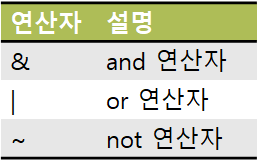

- DataFrame객체[조건], DataFrame객체.loc[조건]
    - 조건이 True인 행만 조회
    - 열까지 선택시
        - DataFrame객체[조건][열]
        - DataFrame객체.loc[조건, 열]
- **iloc[]**은 boolean indexing을 **지원하지 않는다.**

In [152]:
b=[True,True,False,True,False]
score_df3[b]  # True인 행 조회 (1,2,4행)

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-2,50,80,90,80,86,386,77.2
id-4,60,50,90,50,51,301,60.2


In [153]:
score_df3.loc[b]

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-2,50,80,90,80,86,386,77.2
id-4,60,50,90,50,51,301,60.2


In [154]:
score_df3.iloc[b]

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-2,50,80,90,80,86,386,77.2
id-4,60,50,90,50,51,301,60.2


In [157]:
score_df['국어'] > 70

0     True
1    False
2    False
3    False
4     True
Name: 국어, dtype: bool

In [161]:
score_df3.loc[score_df3['국어'] > 70]  [['국어','영어']]  # 조건을 만족하는 행들만 조회 (.loc은 생략가능)

,국어,영어
ID,,
id-1,100,90
id-5,90,100


In [163]:
score_df3.loc[score_df3['국어'] > 70,  ['국어','영어']] 

,국어,영어
ID,,
id-1,100,90
id-5,90,100


In [165]:
score_df3.loc[(score_df3['국어']>70) & (score_df3['영어']==100)]

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-5,90,100,90,60,75,415,83.0


In [166]:
score_df3.loc[(score_df3['국어']>70) | (score_df3['영어']==100)]

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-1,100,90,90,90,85,455,91.0
id-3,70,100,90,30,52,342,68.4
id-5,90,100,90,60,75,415,83.0


In [167]:
score_df3.loc[~(score_df3['국어']>70)]  # ~: not

,국어,영어,수학,과학,역사,총점,평균
ID,,,,,,,
id-2,50,80,90,80,86,386,77.2
id-3,70,100,90,30,52,342,68.4
id-4,60,50,90,50,51,301,60.2


### TODO

In [76]:
#상영시간 (duration)이 300 이상인 영화만 조회
movie_df[movie_df['duration']>=300].sort_values('duration')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Legend of Suriyothai,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124
Heaven's Gate,Color,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,...,189.0,English,USA,R,44000000.0,1980.0,849.0,6.8,2.35,1000
"Blood In, Blood Out",Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000
Carlos,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
Trapped,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0


In [77]:
# 상영시간 (duration)이 300 이상인 영화의 감독이름(director_name) 조회
movie_df.loc[movie_df['duration']>=300, 'director_name']

movie_title
Heaven's Gate                    Michael Cimino
Blood In, Blood Out             Taylor Hackford
Trapped                                     NaN
Carlos                                      NaN
The Legend of Suriyothai    Chatrichalerm Yukol
Name: director_name, dtype: object

In [78]:
#감독이름(director_name)이 'Quentin Tarantino' 의 영화만 조회
movie_df.loc[movie_df['director_name']=='Quentin Tarantino']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Django Unchained,Color,Quentin Tarantino,765.0,165.0,16000.0,265.0,Christoph Waltz,29000.0,162804648.0,Drama|Western,...,1193.0,English,USA,R,100000000.0,2012.0,11000.0,8.5,2.35,199000
Inglourious Basterds,Color,Quentin Tarantino,486.0,153.0,16000.0,11000.0,Brad Pitt,13000.0,120523073.0,Adventure|Drama|War,...,1527.0,English,USA,R,75000000.0,2009.0,11000.0,8.3,2.35,42000
The Hateful Eight,Color,Quentin Tarantino,596.0,187.0,16000.0,1000.0,Jennifer Jason Leigh,46000.0,54116191.0,Crime|Drama|Mystery|Thriller|Western,...,1018.0,English,USA,R,44000000.0,2015.0,1000.0,7.9,2.76,114000
Kill Bill: Vol. 1,Black and White,Quentin Tarantino,354.0,111.0,16000.0,640.0,Vivica A. Fox,926.0,70098138.0,Action,...,2105.0,English,USA,R,30000000.0,2003.0,890.0,8.1,2.35,13000
Kill Bill: Vol. 2,Black and White,Quentin Tarantino,304.0,137.0,16000.0,348.0,Michael Parks,890.0,66207920.0,Action|Crime|Drama|Thriller,...,935.0,English,USA,R,30000000.0,2004.0,387.0,8.0,2.35,0
Jackie Brown,Color,Quentin Tarantino,140.0,154.0,16000.0,889.0,Sid Haig,22000.0,39647595.0,Crime|Thriller,...,462.0,English,USA,R,12000000.0,1997.0,1000.0,7.5,1.85,0
Pulp Fiction,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
Reservoir Dogs,Color,Quentin Tarantino,173.0,99.0,16000.0,455.0,Steve Buscemi,16000.0,2812029.0,Crime|Drama|Thriller,...,931.0,English,USA,R,1200000.0,1992.0,12000.0,8.4,2.35,19000
